# 210409 Fix Component 10

In [1]:
const COMPONENT = 10;

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-11562954670889827651\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-16372314540743283353\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-11562954670889827651\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

,id,ncbi_id,name,rank,parent_id,in_v12,manual_threshold,report,ngenomes,comp_idx,diameter,outgoing,incoming,name_abbr
,Int64,Int64?,String,String?,Int64?,Bool,Float64,Bool,Int64,Int64,Float32,Int64,Int64,SubStri…
1,572,375,Bradyrhizobium japonicum,species,87,1,NaN,1,15,1,0.928118,3,0,japonicum
2,942,108015,Bradyrhizobium yuanmingense,species,87,1,NaN,1,4,2,0.591944,0,1,yuanmingense
3,1252,43992,Bradyrhizobium liaoningense,species,87,1,NaN,1,2,3,0.0588606,0,1,liaoningense
4,1389,1355477,Bradyrhizobium diazoefficiens,species,87,1,NaN,1,4,4,0.436347,0,1,diazoefficiens


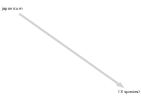

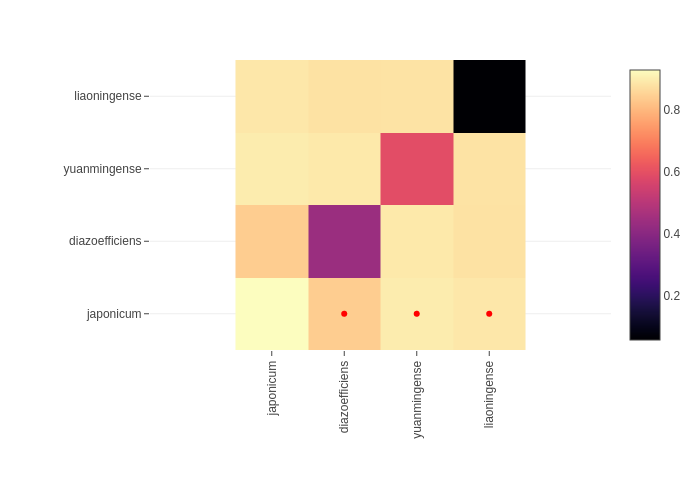

In [2]:
include("fix-component-base.jl");

In [3]:
trees = Dict{String, Any}();

## Edits

### japonicum

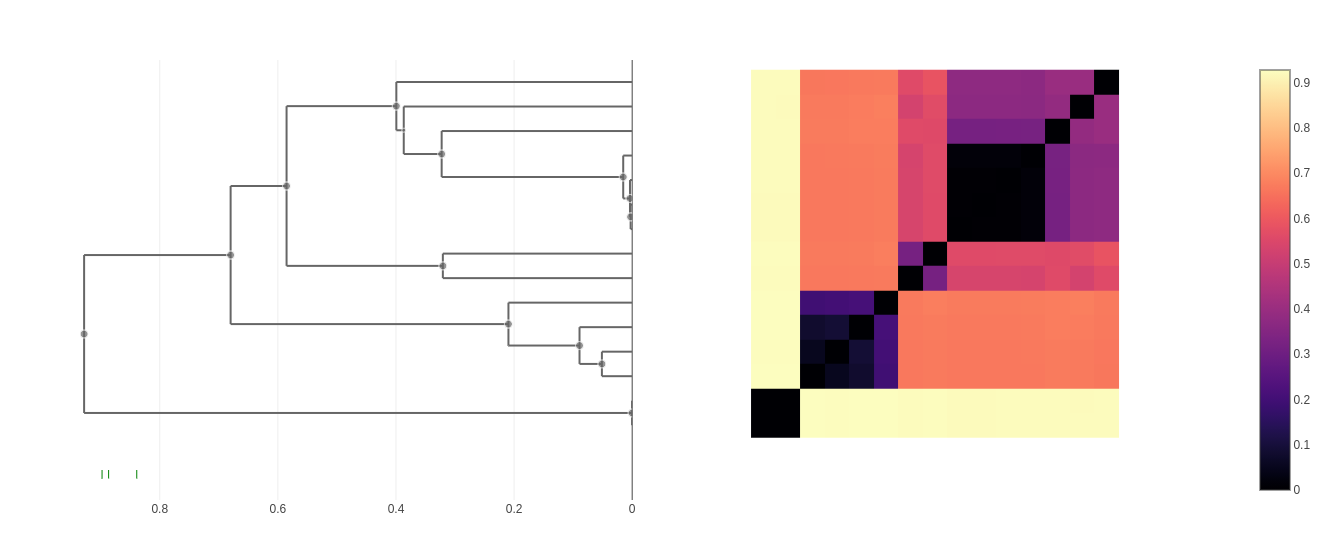

In [4]:
let taxon = "japonicum"
    trees[taxon] = cluster_annotate(cdata, taxon)
    plot(clustermap(cdata, trees[taxon]))
end

In [5]:
remove_subtrees!(edits, trees["japonicum"], 16)

#1 japonicum:
	2/15 removed
	Diameter 0.9281 => 0.6800


## Finish

In [6]:
complete_edits(edits)

,index,name,ngenomes,initial_diameter,taxon_removed,removed_genomes,split,manual_threshold,final_diameter
,Int64,SubStri…,Int64,Float32,Bool,Int64,String,Missing,String
1,1,japonicum,15,0.928118,0,2,,missing,0.6800
